In [1]:
import pandas as pd
import numpy as np

In [2]:
xGoalsCity = pd.read_html('https://fbref.com/en/matches/615eff06/Manchester-Derby-Manchester-City-Manchester-United-March-3-2024-Premier-League', attrs={"id":"shots_b8fd03ef"})[0]
xGoalsUnited = pd.read_html('https://fbref.com/en/matches/615eff06/Manchester-Derby-Manchester-City-Manchester-United-March-3-2024-Premier-League', attrs={"id":"shots_19538871"})[0]

In [3]:
cityArray = xGoalsCity["Unnamed: 3_level_0"].to_numpy()
cityArray = cityArray[~np.isnan(cityArray)]
print(cityArray)

[0.04 0.3  0.09 0.07 0.02 0.08 0.47 0.03 0.09 0.03 0.3  0.1  0.03 0.17
 0.03 0.05 0.89 0.03 0.04 0.03 0.02 0.02 0.14 0.03 0.08 0.03 0.12]


In [4]:
UnitedArray = xGoalsUnited["Unnamed: 3_level_0"].to_numpy()
UnitedArray = UnitedArray[~np.isnan(UnitedArray)]
print(UnitedArray)

[0.02 0.18 0.04]


In [5]:
print(f"Manchester City: {len(cityArray)} shots, xG: {cityArray.sum()}\nManchester United: {len(UnitedArray)} shots, xG: {UnitedArray.sum()}")

Manchester City: 27 shots, xG: 3.3299999999999996
Manchester United: 3 shots, xG: 0.24


In [6]:
def simulate_match(team_a_xgs, team_b_xgs):
    team_a_shots_simulation = np.random.random_sample(len(team_a_xgs))
    team_b_shots_simulation = np.random.random_sample(len(team_b_xgs))

    team_a_goals = (team_a_shots_simulation <= team_a_xgs).sum()
    team_b_goals = (team_b_shots_simulation <= team_b_xgs).sum()


    return [team_a_goals, team_b_goals]

print(simulate_match(cityArray, UnitedArray))

[1, 1]


In [7]:
n_times = 900000
result = []
for i in range(n_times):
    result.append(simulate_match(team_a_xgs=cityArray, team_b_xgs=UnitedArray))

result = pd.DataFrame(result, columns=["City", "United"])

result


,City,United
0,2,0
1,5,0
2,6,1
3,4,0
4,4,0
...,...,...
899995,3,0
899996,3,0
899997,5,1
899998,3,0


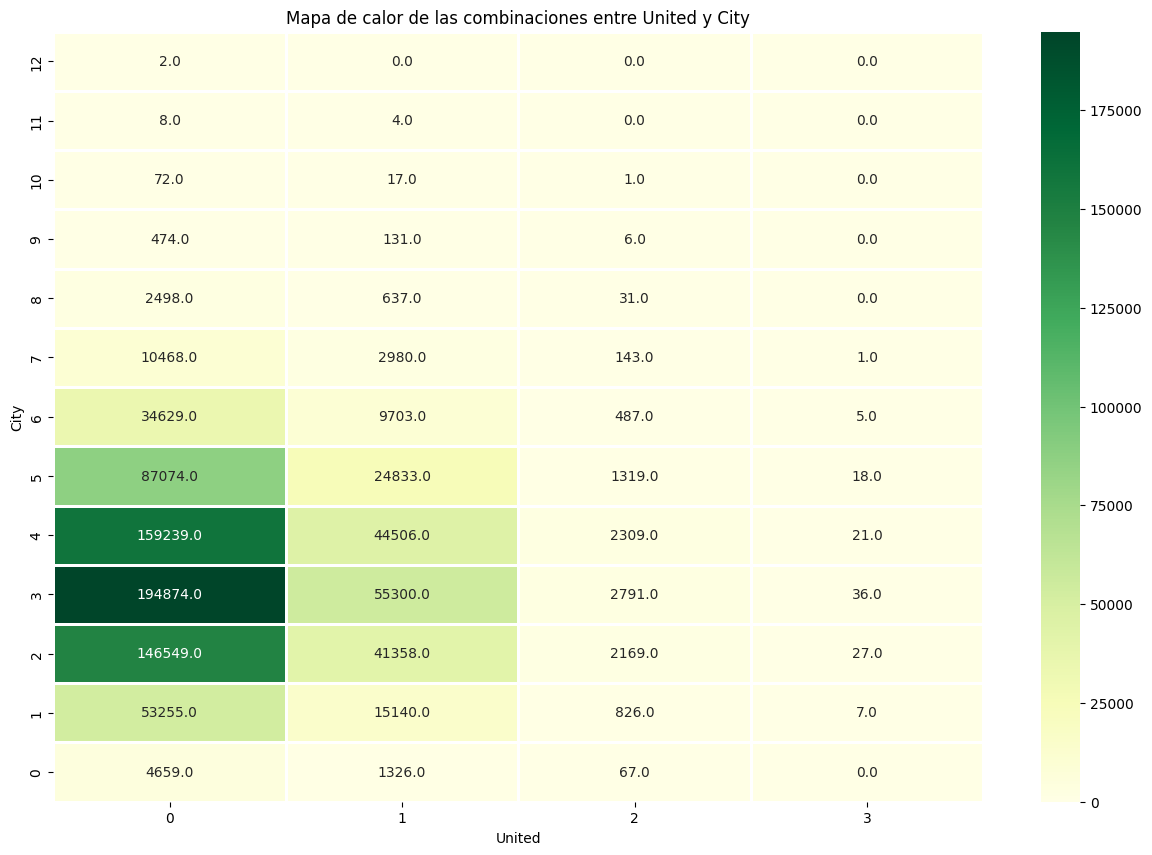

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crear una tabla cruzada de las dos columnas
cross_tab = pd.crosstab(result['City'], result['United'])
#cross_tab = pd.crosstab(result['City'], result['United'], normalize='all') * 100

# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGn", linewidth=2)
plt.gca().invert_yaxis()
plt.xlabel('United')
plt.ylabel('City')
plt.title('Mapa de calor de las combinaciones entre United y City')
plt.show()

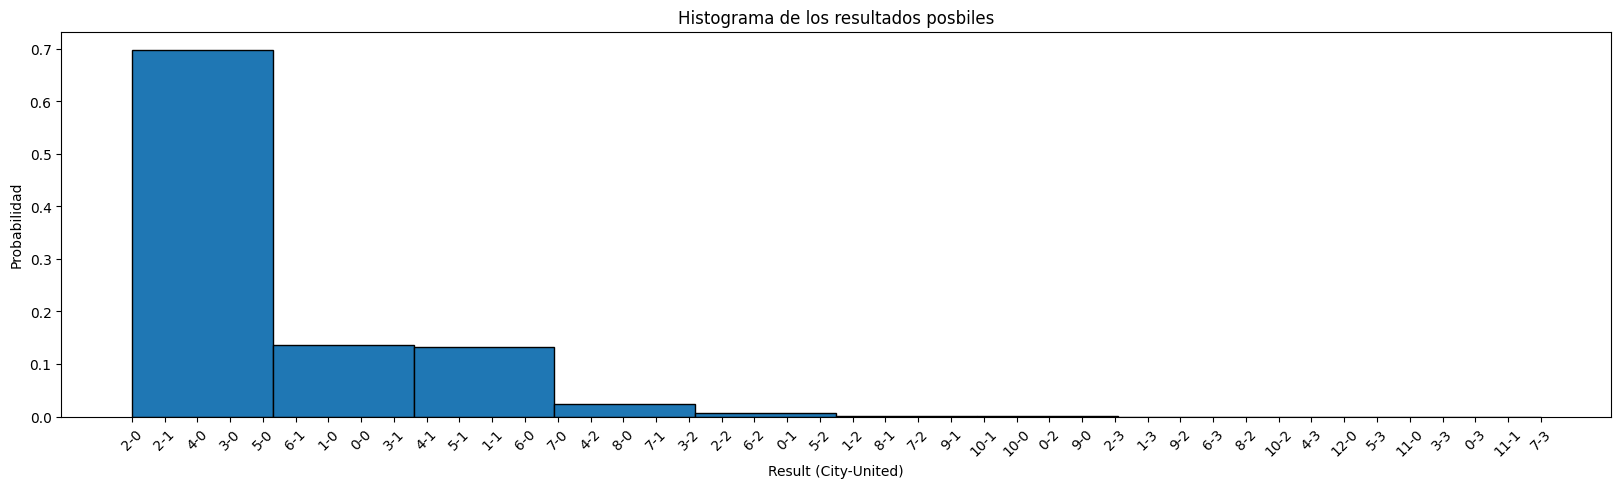

In [134]:
result["result"] = result.apply(lambda x: f"{x['City']}-{x['United']}", axis=1)

plt.figure(figsize=(20, 5))
plt.hist(result["result"], weights=[1/len(result)]*len(result), edgecolor='black')
plt.xlabel('Result (City-United)')
plt.ylabel('Probabilidad')
plt.title('Histograma de los resultados posbiles')
plt.xticks(rotation=45)
plt.show()